# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [1]:
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt

# функция, вычисляющяя значение f(x) по известному x
def f(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)


In [2]:

# нахождение минимального значения функции с начальной точкой x = 2
result1 = scipy.optimize.minimize(f, 2, method='BFGS')

print("Начальная точка x = 2")
print(f"Оптимальное значение переменной: {result1.x[0]:.4f}")
print(f"Минимальное значение функции: {result1.fun:.4f}")
print()

# нахождение минимального значения функции с начальной точкой x = 30
result2 = scipy.optimize.minimize(f, 30, method='BFGS')

print("Начальная точка x = 30")
print(f"Оптимальное значение переменной: {result2.x[0]:.2f}")
print(f"Минимальное значение функции: {result2.fun:.2f}")
print()

Начальная точка x = 2
Оптимальное значение переменной: 4.1363
Минимальное значение функции: 1.7453

Начальная точка x = 30
Оптимальное значение переменной: 25.88
Минимальное значение функции: -11.90



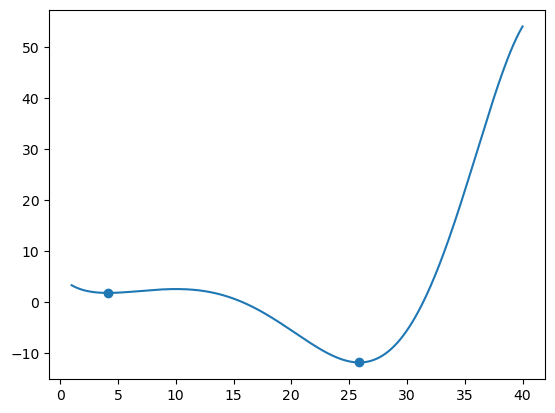

In [3]:

x = np.linspace(1, 40, 300)
plt.plot(x, f(x))
plt.scatter([result1.x[0], result2.x[0]], [result1.fun, result2.fun])
plt.show()

## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5.Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [4]:
# обозначаем границы аргумента функции
bounds = [(1, 30)]

# находим минимальное значение функции с помощью диффренециальной эволюции
result = scipy.optimize.differential_evolution(f, bounds=bounds)

print(f"Оптимальное значение переменной: {round(result2.x[0], 2)}")
print(f"Минимальное значение функции: {round(result2.fun, 2)}")

Оптимальное значение переменной: 25.88
Минимальное значение функции: -11.9


In [5]:
print(f"Количество итераций для BFGS: {result1.nit}")
print(f"Количество итераций для дифференциальной эволюции: {result2.nit}")
print()
print(f"Количество вычислений для BFGS: {result1.nfev}")
print(f"Количество вычислений для дифференциальной эволюции: {result2.nfev}")

Количество итераций для BFGS: 6
Количество итераций для дифференциальной эволюции: 6

Количество вычислений для BFGS: 14
Количество вычислений для дифференциальной эволюции: 14


## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

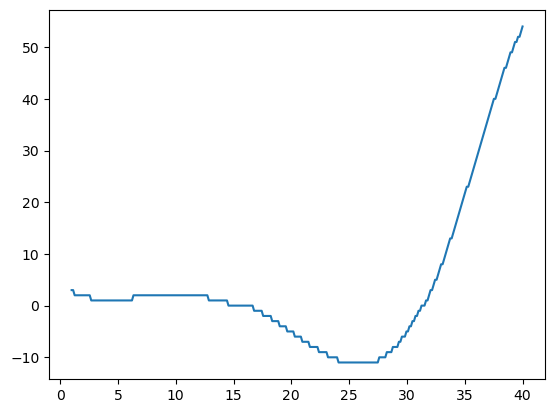

In [6]:
# функция, вычисляющяя значение h(x) по известному x и приводим к типу integer
def h(x):
    return (np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)).astype('int')


x = np.linspace(1, 40, 300)

plt.plot(x, h(x))
plt.show()

In [7]:
# находим минимум для негладкой и разрывной функции с помощью градиента
not_dif_res1 = scipy.optimize.minimize(h, 30, method="BFGS")

print("Поиск по градиенту")
print(f"Оптимальное значение переменной: {not_dif_res1.x[0]}")
print(f"Оптимальное значение функции: {not_dif_res1.fun}")
print()

# находим минимум функции с помощью дифференициальной эволюции
bounds = [(1, 30)]
not_dif_res2 = scipy.optimize.differential_evolution(h, bounds=bounds)

print("поиск по дифференициальной эволюции")
print(f"Оптимальное значение переменной: {not_dif_res2.x[0]}")
print(f"Оптимальное значение функции: {not_dif_res2.fun}")
print()

Поиск по градиенту
Оптимальное значение переменной: 30.0
Оптимальное значение функции: -5

поиск по дифференициальной эволюции
Оптимальное значение переменной: 26.57492932536802
Оптимальное значение функции: -11.0



In [8]:
# найдем градиент с другими начальными приближениями

# начальное приближение равно 5
grad5 = scipy.optimize.minimize(h, 5, method="BFGS")

print(f"Оптимальное значение переменной: {grad5.x[0]}")
print(f"Оптимальное значение функции: {grad5.fun}")
print()


# начальное приближение равно 25
grad25 = scipy.optimize.minimize(h, 25, method="BFGS")

print(f"Оптимальное значение переменной: {grad25.x[0]}")
print(f"Оптимальное значение функции: {grad25.fun}")
print()

# как видно градиент остается на месте, это происходит потому что функция в начальной точке не увеличивается и не уменьшается
# следовательно использовать градиент - не лучшая идея

Оптимальное значение переменной: 5.0
Оптимальное значение функции: 1

Оптимальное значение переменной: 25.0
Оптимальное значение функции: -11

